raw_ee_viewer should satisty the following functional requirements and always include :

- View one image and any subset of it's bands. We should also be able to see 
- View a folder by displaying all of its images at the same time
- View a folder by displaying all of its images as a gif

- View one DEM

todo
- figure out how to get rid of the missing image
- find representative examples
- 


view_raw_tif(path, band_name)

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [2]:
class raw_ee_viewer_constants:
    l5_band_dict = {
        'blue':0,
        'green':1,
        'red':2,
        'nir':3,
        'swir':4,
        'thermal':5,
        'swir2':6,
        'bqa':7
    }
    
    l7_band_dict = {
        'blue':0,
        'green':1,
        'red':2,
        'nir':3,
        'swir':4,
        'thermal':5,
        'thermal_2':6,
        'swir2':7,
        'panchromatic':8,
        'bqa':9
    }
    
    l8_band_dict = {
        'coastal_aerosol':0,
        'blue':1,
        'green':2,
        'red':3,
        'nir':4,
        'swir':5,
        'swir2':6,
        'panchromatic':7,
        'cirrus':8,
        'thermal':9,
        'thermal_2':10,
        'bqa':11
    }
    glims_id_str_ind = 0    
    date_str_ind = 1
    landsat_num_str_ind = 2


In [3]:
def view_raw_tif_from_file(tif_path, band_name):
    file_name = tif_path.split("/")[-1]
    split_str = file_name.split("_")

    img_glims_id = split_str[raw_ee_viewer_constants.glims_id_str_ind]
    img_date = split_str[raw_ee_viewer_constants.date_str_ind]
    img_landsat_number = split_str[raw_ee_viewer_constants.landsat_num_str_ind][-1]

    if img_landsat_number == "5": band_ind = raw_ee_viewer_constants.l5_band_dict[band_name]
    if img_landsat_number == "7": band_ind = raw_ee_viewer_constants.l7_band_dict[band_name]
    if img_landsat_number == "8": band_ind = raw_ee_viewer_constants.l8_band_dict[band_name]            

    with rasterio.open(tif_path) as src:
        img = src.read()
        plt.title(f"GLIMS ID: {img_glims_id}\nImage shape: {img[band_ind,:,:].shape}\n Lansat: {img_landsat_number}\nDate:{img_date}")
        plt.imshow(img[band_ind,:,:])
        plt.show()
        


In [4]:
def view_raw_tifs_from_folder(folder_path, band_name):
    tif_names = os.listdir(folder_path)
    n = len([tif for tif in tif_names if len(tif) >= 10])
    n_cols = 5
    n_rows = int(np.ceil(n/n_cols))
    img_count = 0
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(17,17))
    for i in range(n_rows):
        for j in range(n_cols): 
            if img_count <= n:
                if len(tif_names[img_count]) < 10:
                    img_count += 1
                    continue
                tif_path = os.path.join(folder_path, tif_names[img_count])
                file_name = tif_path.split("/")[-1]
                split_str = file_name.split("_")

                img_glims_id = split_str[raw_ee_viewer_constants.glims_id_str_ind]
                img_date = split_str[raw_ee_viewer_constants.date_str_ind]
                img_landsat_number = split_str[raw_ee_viewer_constants.landsat_num_str_ind][-1]

                if img_landsat_number == "5": band_ind = raw_ee_viewer_constants.l5_band_dict[band_name]
                if img_landsat_number == "7": band_ind = raw_ee_viewer_constants.l7_band_dict[band_name]
                if img_landsat_number == "8": band_ind = raw_ee_viewer_constants.l8_band_dict[band_name]            

                with rasterio.open(tif_path) as src:
                    img = src.read()
                    axes[i, j].imshow(img[band_ind,:,:])
                    axes[i, j].title.set_text(f"GLIMS ID: {img_glims_id}\nImage shape: {img[band_ind,:,:].shape}\n Lansat: {img_landsat_number} Band: {band_name}\nDate:{img_date}")
                    img_count+=1
    plt.show()


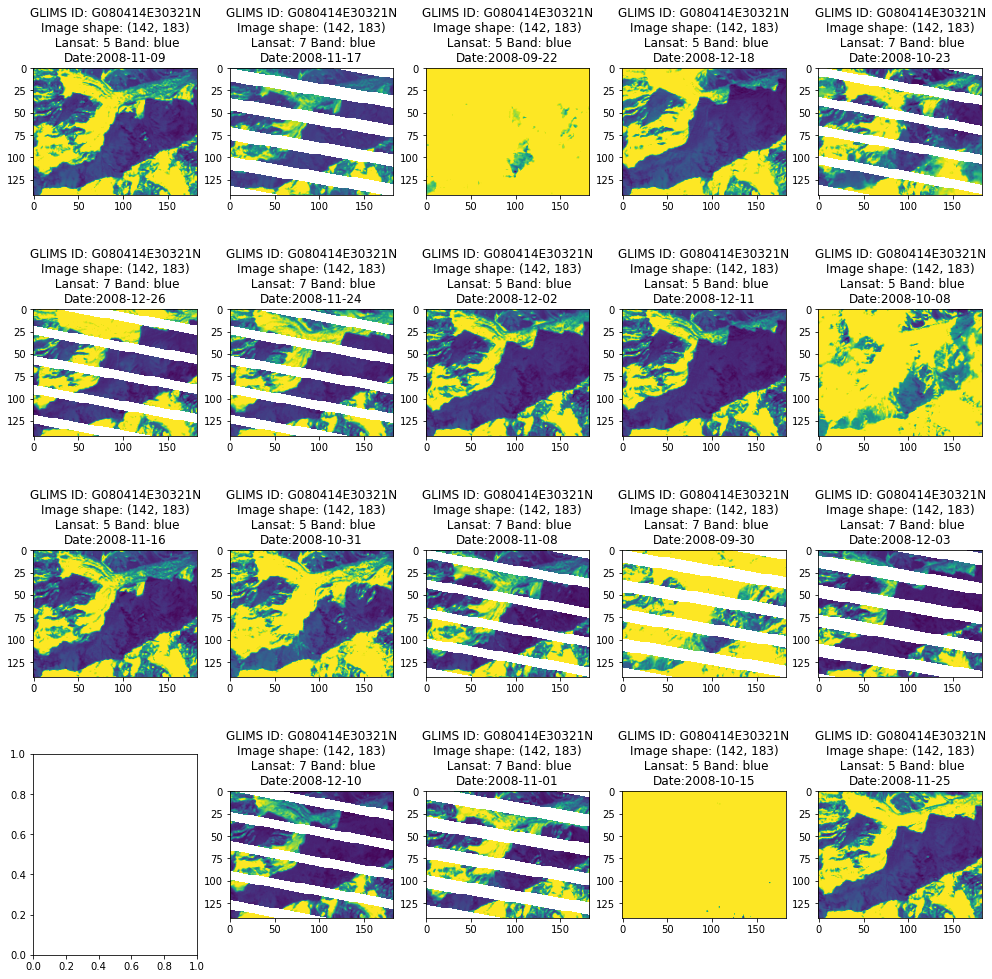

In [30]:
folder_dir = "/Users/mattw/Desktop/projects/GlacierView/data/ee_data/training/UTM/"
folders = os.listdir(folder_dir)
folder = random.choice(folders)
tif_dir = os.path.join(folder_dir, folder)
view_raw_tifs_from_folder(tif_dir, "blue")